In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import os
import librosa
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [60]:
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'

metadata = pd.read_csv(metadata_path)

def extract_features_from_spectrogram(file_path, zip_file):
    with zip_file.open(file_path) as file:
        y, sr = librosa.load(file, sr=None)
    stft = librosa.stft(y)
    spectrogram = np.abs(stft)
    mean_spectrogram = np.mean(spectrogram, axis=1)
    std_spectrogram = np.std(spectrogram, axis=1)
    return np.hstack([mean_spectrogram, std_spectrogram])

In [4]:
features = []
labels = []

with zipfile.ZipFile(zip_path, 'r') as z:
    for index, row in metadata.iterrows():
        file_path = os.path.join('wavfiles', row['filename'])
        if file_path in z.namelist():
            features.append(extract_features_from_spectrogram(file_path, z))
            labels.append(row['species'])
            print()
            print("Extracted features: ",features)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Streaming output truncated to the last 5000 lines.
       0.00205898], dtype=float32), array([0.31356072, 0.4877305 , 0.7974835 , ..., 0.0067682 , 0.00674114,
       0.00670963], dtype=float32), array([1.1511867 , 1.5206839 , 1.8469528 , ..., 0.00354204, 0.00359614,
       0.00365186], dtype=float32), array([0.2536911 , 0.27586073, 0.45837742, ..., 0.01254304, 0.01253872,
       0.0125529 ], dtype=float32), array([0.25682336, 0.30847204, 0.5684693 , ..., 0.00363679, 0.00367907,
       0.00373739], dtype=float32), array([0.19610052, 0.20977105, 0.25900462, ..., 0.00130289, 0.00130099,
       0.00130988], dtype=float32), array([0.18921234, 0.215061  , 0.26736364, ..., 0.00375921, 0.00379196,
       0.0037705 ], dtype=float32), array([0.18832521, 0.19997582, 0.27800366, ..., 0.00221558, 0.00226693,
       0.00228805], dtype=float32), array([0.1802269 , 0.19797078, 0.2597286 , ..., 0.01885027, 0.01881688,
       0.01881956], dtype=float32), array([0.01924813, 0.04110548, 0.03744466, ..., 0

In [16]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features_indices = selector.get_support(indices=True)


print("Indices of selected features:", selected_features_indices)

Indices of selected features: [1209 1227 1228 1229 1230 1231 1232 1233 1244 1264]


In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [68]:
label_encoder = LabelEncoder()

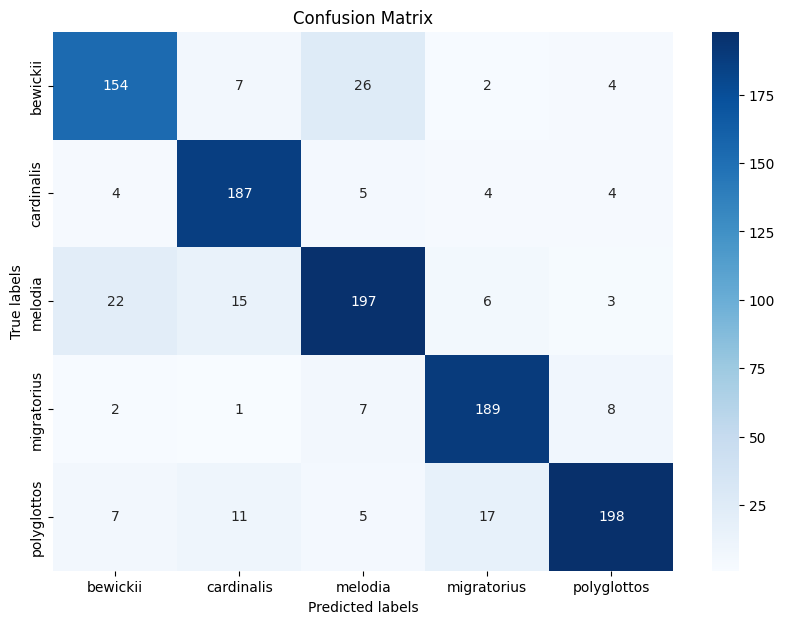

              precision    recall  f1-score   support

    bewickii       0.81      0.80      0.81       193
  cardinalis       0.85      0.92      0.88       204
     melodia       0.82      0.81      0.82       243
 migratorius       0.87      0.91      0.89       207
 polyglottos       0.91      0.83      0.87       238

    accuracy                           0.85      1085
   macro avg       0.85      0.85      0.85      1085
weighted avg       0.85      0.85      0.85      1085



In [73]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

knn.fit(X_train_scaled, y_train_encoded)
y_pred_encoded = knn.predict(X_test_scaled)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))


In [33]:
confusion_matrix(y_test, y_pred)

array([[154,   7,  26,   2,   4],
       [  4, 187,   5,   4,   4],
       [ 22,  15, 197,   6,   3],
       [  2,   1,   7, 189,   8],
       [  7,  11,   5,  17, 198]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    bewickii       0.81      0.80      0.81       193
  cardinalis       0.85      0.92      0.88       204
     melodia       0.82      0.81      0.82       243
 migratorius       0.87      0.91      0.89       207
 polyglottos       0.91      0.83      0.87       238

    accuracy                           0.85      1085
   macro avg       0.85      0.85      0.85      1085
weighted avg       0.85      0.85      0.85      1085

